In [4]:
# https://medium.com/coinmonks/an-introduction-to-pytorch-by-working-on-the-moons-dataset-using-neural-networks-369b1ac6ccad

import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
plt.style.use('seaborn')
%matplotlib inline

In [5]:
from viz import make_plot, make_meshgrid

In [6]:
X,y = datasets.make_moons(n_samples=5000, shuffle=True, noise=0.2, random_state=1234)
y = np.reshape(y, (len(y),1))

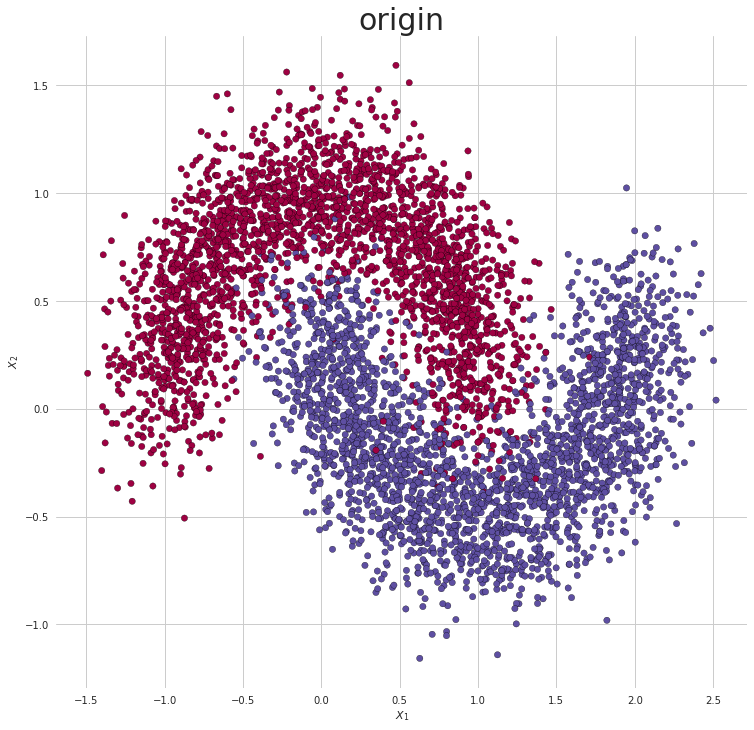

In [7]:
make_plot(X, y, "origin")

In [8]:
input_size = 2
hidden_size = 3 # randomly chosen
output_size = 1 # we want it to return a number that can be used to calculate the difference from the actual number

In [9]:
class NeuralNetwork():
    def __init__(self, input_size, hidden_size, output_size):
        # weights
        self.W1 = torch.randn(input_size, hidden_size, requires_grad=True)
        self.W2 = torch.randn(hidden_size, hidden_size, requires_grad=True)
        self.W3 = torch.randn(hidden_size, output_size, requires_grad=True)

        # Add bias
        self.b1 = torch.randn(hidden_size, requires_grad=True)
        self.b2 = torch.randn(hidden_size, requires_grad=True)
        self.b3 = torch.randn(output_size, requires_grad=True)

    def forward(self, inputs):
        z1 = inputs.mm(self.W1).add(self.b1)
        a1 = 1 / (1 + torch.exp(-z1))
        z2 = a1.mm(self.W2).add(self.b2)
        a2 = 1 / (1 + torch.exp(-z2))
        z3 = a2.mm(self.W3).add(self.b3)
        output = 1 / (1 + torch.exp(-z3))
        return output

In [10]:
epochs = 500
learning_rate = 0.005

In [11]:
model = NeuralNetwork(input_size, hidden_size, output_size)

In [12]:
inputs = torch.tensor(X, dtype=torch.float)
labels = torch.tensor(y, dtype=torch.float)

In [13]:
#store all the loss values
losses = []

for epoch in range(epochs):

    # forward function
    output = model.forward(inputs)

    #BinaryCrossEntropy formula
    # 원본에 sum()을 mean()으로 수정(sample data가 많을 수록 loss가 커짐)
    loss = -((labels * torch.log(output)) + (1 - labels) * torch.log(1 - output)).mean()

    #Log the log so we can plot it later
    losses.append(loss.item())

    #calculate the gradients of the weights wrt to loss
    loss.backward()

    #adjust the weights based on the previous calculated gradients
    model.W1.data -= learning_rate * model.W1.grad
    model.W2.data -= learning_rate * model.W2.grad
    model.W3.data -= learning_rate * model.W3.grad
    model.b1.data -= learning_rate * model.b1.grad
    model.b2.data -= learning_rate * model.b2.grad
    model.b3.data -= learning_rate * model.b3.grad

    #clear the gradients so they wont accumulate
    model.W1.grad.zero_()
    model.W2.grad.zero_()
    model.W3.grad.zero_()
    model.b1.grad.zero_()
    model.b2.grad.zero_()
    model.b3.grad.zero_()

print("Final loss: ", losses[-1])

Final loss:  0.785034716129303


Text(0, 0.5, 'loss')

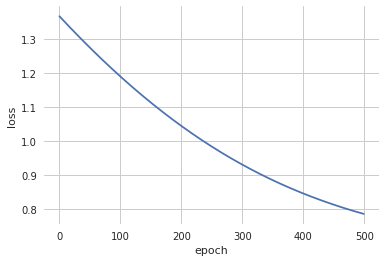

In [14]:
plt.plot(losses)
plt.xlabel("epoch")
plt.ylabel("loss")


In [19]:
xx, yy, mesh_reshaped = make_meshgrid(X, 0.2)
mesh_reshaped = torch.tensor(mesh_reshaped, dtype=torch.float)
print(mesh_reshaped.shape)
Z = model.forward(mesh_reshaped)
Z = Z.detach().numpy()
Z[:5]

torch.Size([494, 2])


array([[0.7625166 ],
       [0.76222074],
       [0.76192176],
       [0.76162064],
       [0.7613184 ]], dtype=float32)

/home/curt/projects/pytorch-first/back_propagation_numpy/viz.py:24: UserWarning: No contour levels were found within the data range.
  plt.contour(XX, YY, preds.reshape(XX.shape), levels=[.5], cmap="Greys", vmin=0, vmax=.6)


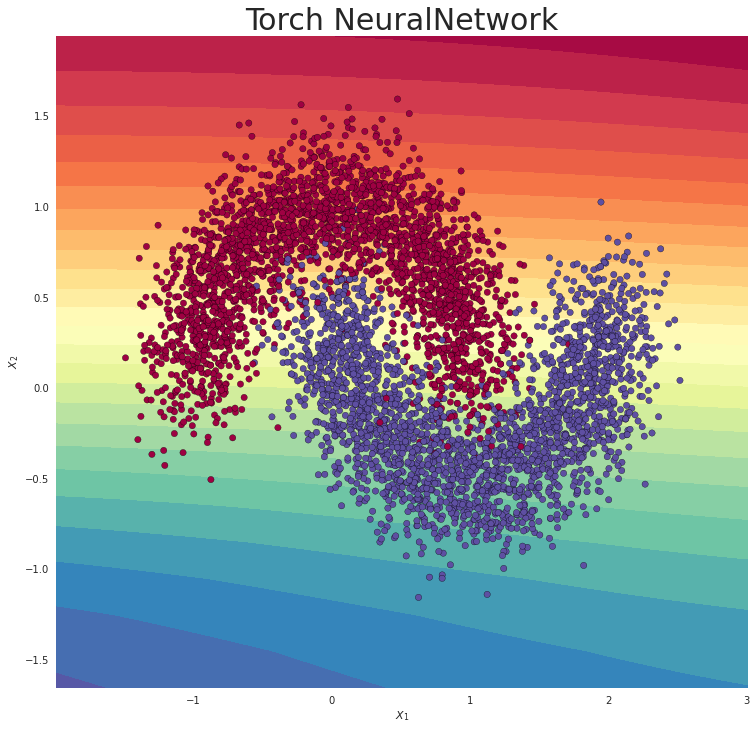

In [20]:
make_plot(X, y, "Torch NeuralNetwork", XX=xx, YY=yy, preds=Z)